In [1]:
import numpy as np
import pandas as pd
import random as random

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix

import numpy as np
import numpy.random as r

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

classes = ['0', '1', '2','3', '4','5', '6', '7', '8', '9']
nclasses = len(classes)

train_data =  np.array(train_df)
test_data =  np.array(test_df)
data = np.concatenate((train_data, test_data), axis=0)

X_train = np.array(train_data[:,1:])
y_train = np.array(train_data[:,0])
X_test = np.array(test_data[:,1:])
y_test = np.array(test_data[:,0]) 

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

c is 0.0001
test accuracy is: 0.8589
train accuracy is: 0.86685


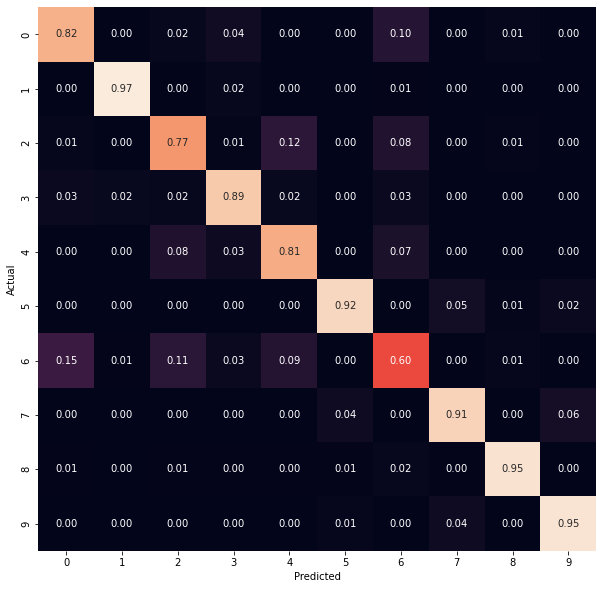

In [3]:
c = .0001
clf = LogisticRegression(penalty='none', tol=0.1, solver='saga').fit(X_train_scaled, y_train)
    
y_pred = clf.predict(X_test_scaled)
    
print('c is',c)
print('test accuracy is:',accuracy_score(y_test, y_pred))
none_test = [accuracy_score(y_test, y_pred)]
print('train accuracy is:',accuracy_score(y_train, clf.predict(X_train_scaled)))
none_train = [accuracy_score(y_train, clf.predict(X_train_scaled))]
    
cm = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'], normalize='index')
p = plt.figure(figsize=(10,10))
p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
    
c *= 10



In [ ]:
c = .0001
l2_test = []
l2_train = []
while c != 1000:
    clf = LogisticRegression(penalty='l2', tol=0.1, solver='saga',C=c).fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    
    print('c is',c)
    print('test accuracy is:',accuracy_score(y_test, y_pred))
    l2_test.append(accuracy_score(y_test, y_pred))
    l2_train.append(accuracy_score(y_train, clf.predict(X_train_scaled)))
    print('train accuracy is:',accuracy_score(y_train, clf.predict(X_train_scaled)))
    
    cm = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'], normalize='index')
    p = plt.figure(figsize=(10,10))
    p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
    
    c *= 10

c is 0.0001
test accuracy is: 0.7596
train accuracy is: 0.7586833333333334
c is 0.001
test accuracy is: 0.825
train accuracy is: 0.8234833333333333
c is 0.01
test accuracy is: 0.8503
train accuracy is: 0.8520166666666666


In [ ]:
c = .0001
l1_test = []
l1_train = []
while c != 1000:
    clf = LogisticRegression(penalty='l1', tol=0.1, solver='saga',C=c).fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    
    print('c is',c)
    print('test accuracy is:',accuracy_score(y_test, y_pred))
    print('train accuracy is:',accuracy_score(y_train, clf.predict(X_train_scaled)))
    l1_test.append(accuracy_score(y_test, y_pred))
    l1_train.append(accuracy_score(y_train, clf.predict(X_train_scaled)))
    
    cm = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'], normalize='index')
    p = plt.figure(figsize=(10,10))
    p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
    
    c *= 10



In [ ]:
c = .0001
en_test = []
en_train = []
while c != 1000:
    clf = LogisticRegression(penalty='elasticnet', tol=0.1, solver='saga',C=c,
                             l1_ratio=.5).fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    
    print('c is',c)
    print('test accuracy is:',accuracy_score(y_test, y_pred))
    print('train accuracy is:',accuracy_score(y_train, clf.predict(X_train_scaled)))
    en_test.append(accuracy_score(y_test, y_pred))
    en_train.append(accuracy_score(y_train, clf.predict(X_train_scaled)))
    
    cm = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'], normalize='index')
    p = plt.figure(figsize=(10,10))
    p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
    
    c *= 10



In [ ]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i)

In [ ]:
lv = [.0001, .001, .01, .1, 1, 10, 100]
plt.plot(lv, en_test, label = "EN")
plt.plot(lv, none_test, label = "None")
plt.plot(lv, l1_test, label = "L1")
plt.plot(lv, l2_test, label = "L2")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C v.s Test Accuracy')
plt.legend()
plt.show()

plt.plot(lv, en_train, label = "EN")
plt.plot(lv, none_train, label = "None")
plt.plot(lv, l1_train, label = "L1")
plt.plot(lv, l2_train, label = "L2")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C v.s Train Accuracy')
plt.legend()
plt.show()